# MLP Básica (Core)

## Descripción:

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## Objetivo:

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación

## Instrucciones

### 1. Carga de datos:

* Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
* Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

### 2. Exploración y preprocesamiento de datos:

* Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
* Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

### 3. Implementación de la MLP:

* Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
* Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

### 4. Entrenamiento del modelo:

* Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
* Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

### 5. Evaluación del modelo:

* Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
* Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

# Resolución

## 1. Carga de Datos

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/breast-cancer-wisconsin-data" (use force=True to force download)


In [2]:
import pandas as pd


camino_ds = "../data/breast-cancer-wisconsin-data/data.csv"
df = pd.read_csv(camino_ds)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.drop(columns=["Unnamed: 32", "id"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
diagnosis,569,0,0.0
compactness_se,569,0,0.0
symmetry_worst,569,0,0.0
concave points_worst,569,0,0.0
concavity_worst,569,0,0.0
compactness_worst,569,0,0.0
smoothness_worst,569,0,0.0
area_worst,569,0,0.0
perimeter_worst,569,0,0.0
texture_worst,569,0,0.0


No parecen haber datos nulos en el dataset.

In [7]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


Tampoco se visualizan datos duplicados.

In [8]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'diagnosis': ['M' 'B']
Columnas convertidas a booleanas: []


In [9]:
def _convertir_diganosis(x):
    return x == 'M'



df["diagnosis"] = df["diagnosis"].apply(_convertir_diganosis).astype("boolean")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    boolean
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()

columnas_objeto_cadena

[]

No se visualizan cadenas de tipo objeto o cadena, por lo cual, no será necesario convertir estos datos.

In [12]:
columnas_flotantes = df.select_dtypes(include="float64")

columnas_convertidas_a_entero = []


def _convertir_a_entero(x):
    if not x.is_integer():
        raise ValueError(f"Valor {x} no es entero")
    return int(x)


for columna in columnas_flotantes:
    datos_columna = df[columna]

    try:
        datos_columna.apply(_convertir_a_entero)
        print(f"Columna '{columna}' es entera. Se procede a convertirla.")
        df[columna] = df[columna].astype("int64")
        columnas_convertidas_a_entero.append(columna)
    except Exception:
        print(f"Columna '{columna}' no es entera. Se mantiene como está.")


print("\n")
print(f"Columnas convertidas a entero: {str(columnas_convertidas_a_entero)}")

Columna 'radius_mean' no es entera. Se mantiene como está.
Columna 'texture_mean' no es entera. Se mantiene como está.
Columna 'perimeter_mean' no es entera. Se mantiene como está.
Columna 'area_mean' no es entera. Se mantiene como está.
Columna 'smoothness_mean' no es entera. Se mantiene como está.
Columna 'compactness_mean' no es entera. Se mantiene como está.
Columna 'concavity_mean' no es entera. Se mantiene como está.
Columna 'concave points_mean' no es entera. Se mantiene como está.
Columna 'symmetry_mean' no es entera. Se mantiene como está.
Columna 'fractal_dimension_mean' no es entera. Se mantiene como está.
Columna 'radius_se' no es entera. Se mantiene como está.
Columna 'texture_se' no es entera. Se mantiene como está.
Columna 'perimeter_se' no es entera. Se mantiene como está.
Columna 'area_se' no es entera. Se mantiene como está.
Columna 'smoothness_se' no es entera. Se mantiene como está.
Columna 'compactness_se' no es entera. Se mantiene como está.
Columna 'concavity_se'

No se encontró ninguna cadena entera que fue interpretada como flotante.

## Exploración y preprocesamiento de datos:

### Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.

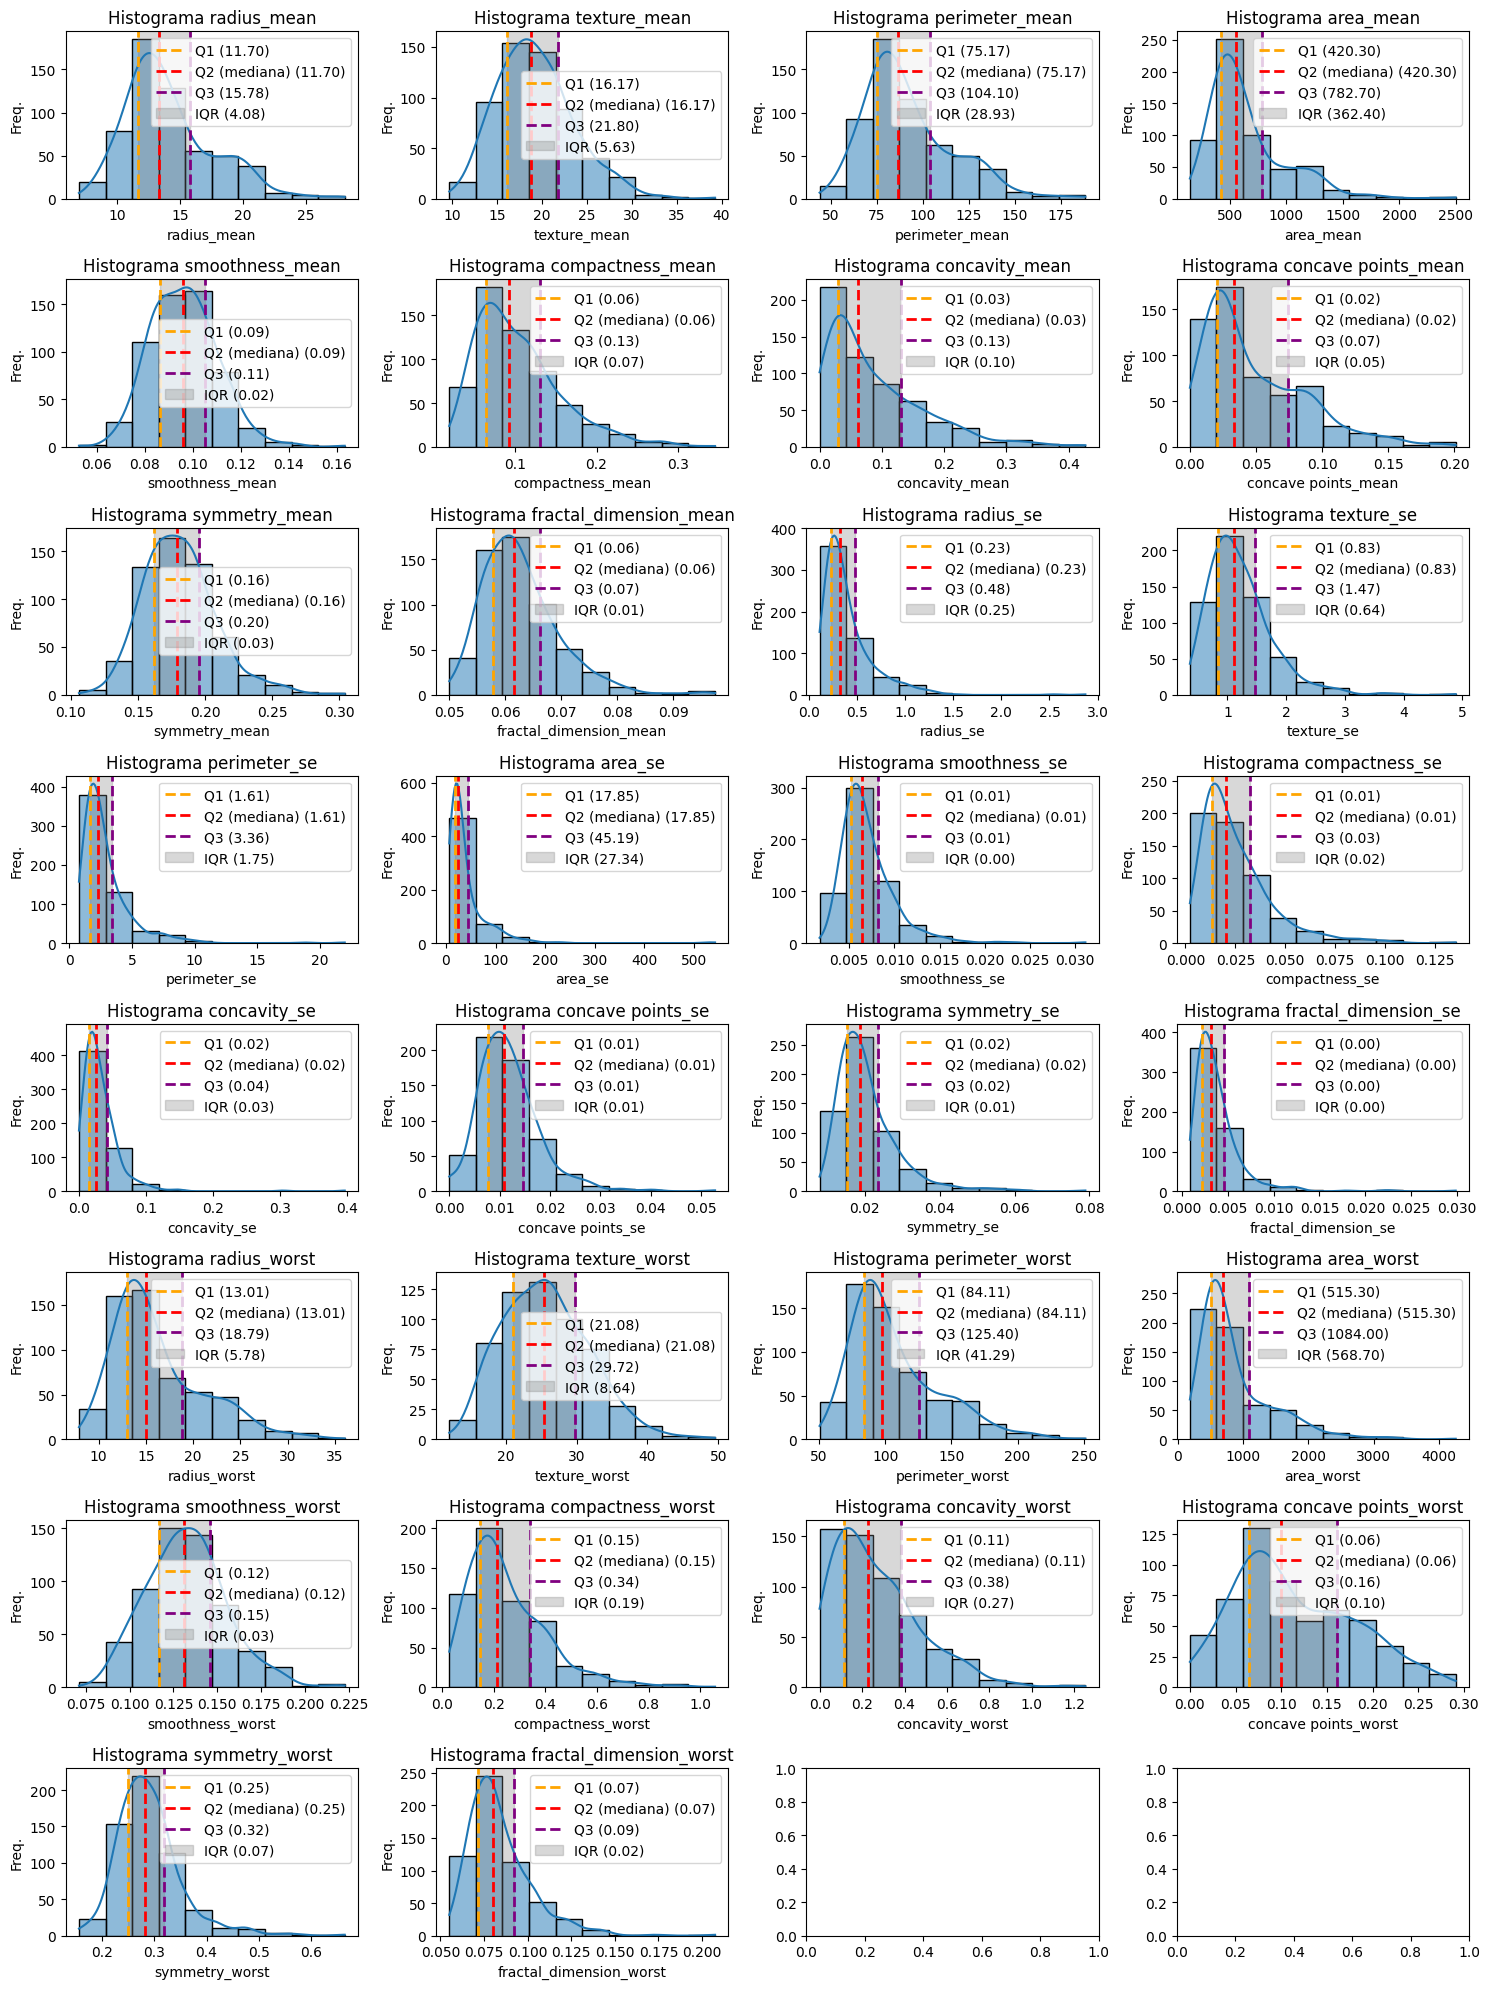

In [13]:
from utils.eda_utils import graficar_histogramas

columnas_numericas = df.columns.tolist()
columnas_numericas.remove("diagnosis")


graficar_histogramas(df, columnas_numericas, 4, bins=10, kde=True, figsize=(15, 20))

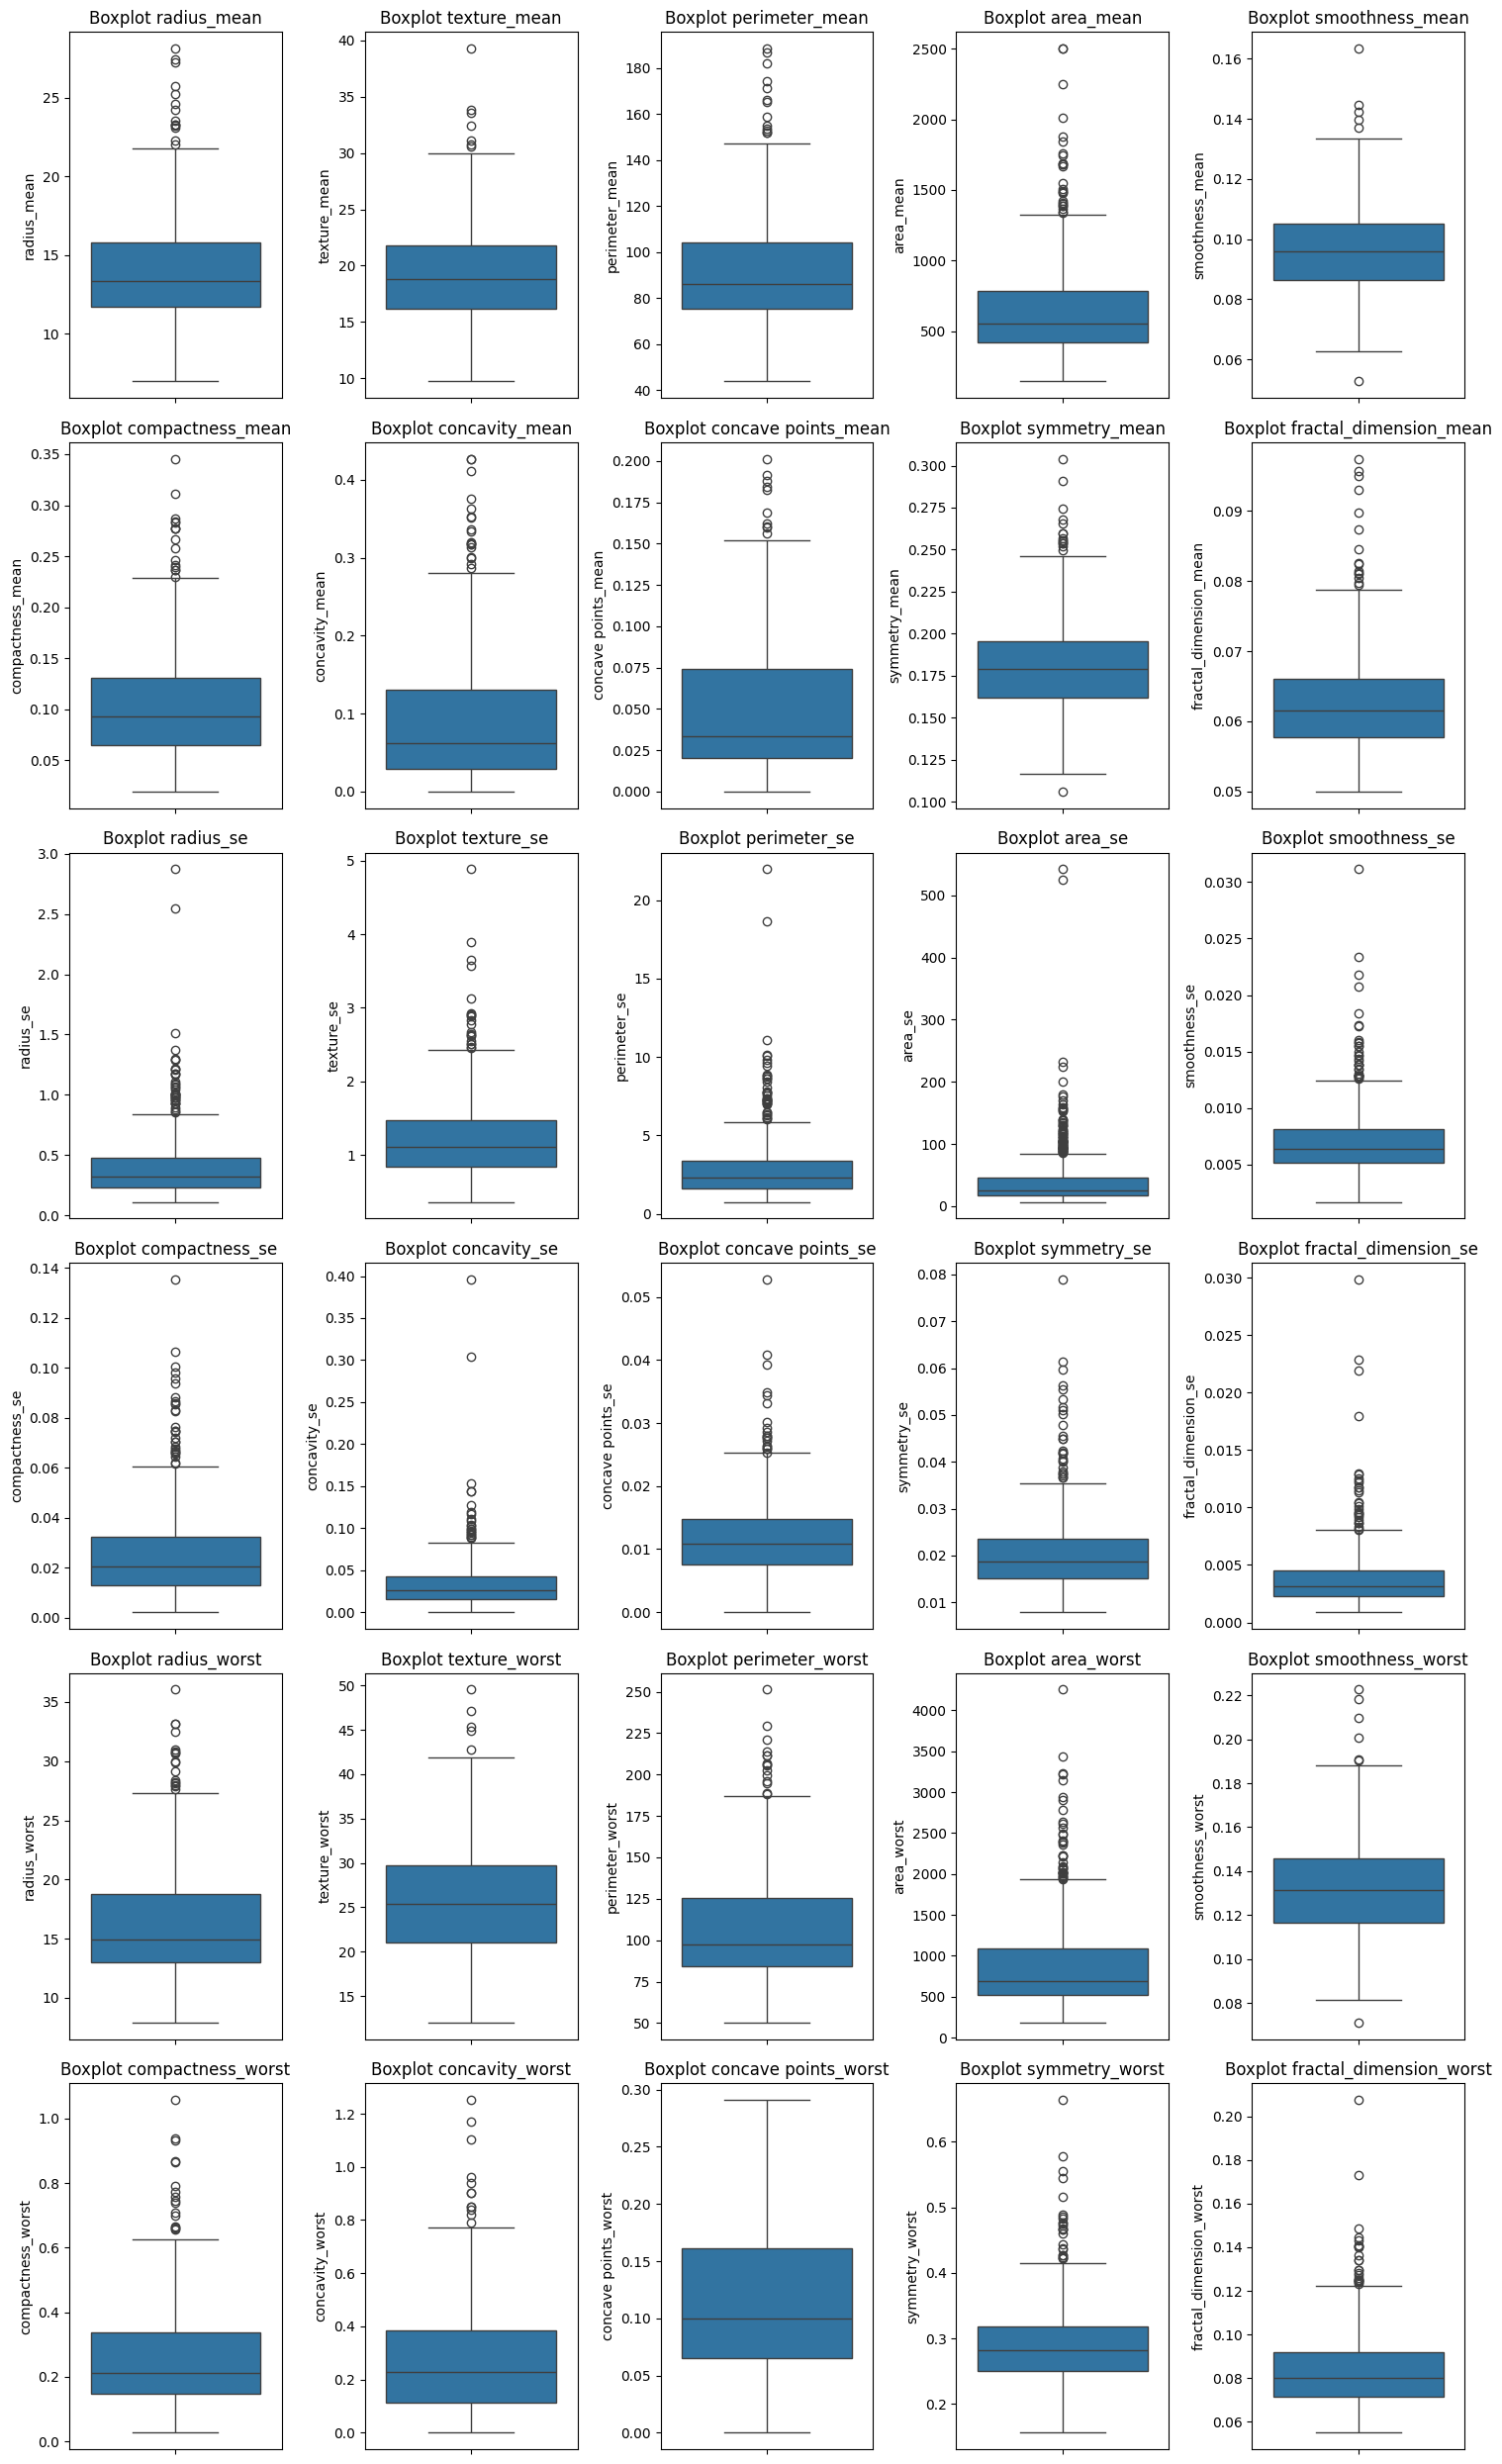

In [14]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=5, figsize=(15, 25))

Como existen muchos outliers en el dataset, la técnica elegida de escalamiento es RobustScaler

### Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

Importamos las librerías necesarias

In [15]:
# Visualización
import matplotlib.pyplot as plt
from utils.classification_utils import graficar_matriz_confusion

# Modelado
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Métricas
# Evaluación
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

2024-12-08 03:57:54.776405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733630274.795094   95117 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733630274.801380   95117 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
X = df[columnas_numericas]
y = df["diagnosis"].apply(lambda x: 1.0 if x else 0.0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Implementación de la MLP:

### Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.

In [19]:
X_train.shape

(455, 30)

In [20]:
model = Sequential([
    Dense(128, activation='relu', input_dim=30),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/diego/.virtualenvs/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733630276.911275   95117 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2173 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento del modelo:

### Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100


I0000 00:00:1733630278.801485   95304 service.cc:148] XLA service 0x7e54a4009300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733630278.801527   95304 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-08 03:57:58.832712: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733630278.985023   95304 cuda_dnn.cc:529] Loaded cuDNN version 90300


38/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.5814

I0000 00:00:1733630279.701791   95304 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7081 - loss: 0.5490 - val_accuracy: 0.9560 - val_loss: 0.2081
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1732 - val_accuracy: 0.9670 - val_loss: 0.1319
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.1070 - val_accuracy: 0.9780 - val_loss: 0.1140
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9847 - loss: 0.0653 - val_accuracy: 0.9670 - val_loss: 0.1075
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0590 - val_accuracy: 0.9780 - val_loss: 0.0992
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0433 - val_accuracy: 0.9670 - val_loss: 0.0979
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9812 - loss: 0.0443 - val_accuracy: 0.9670 - val_loss: 0.1020
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0296 - val_accuracy: 0.9670 - val_loss: 0.

### Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

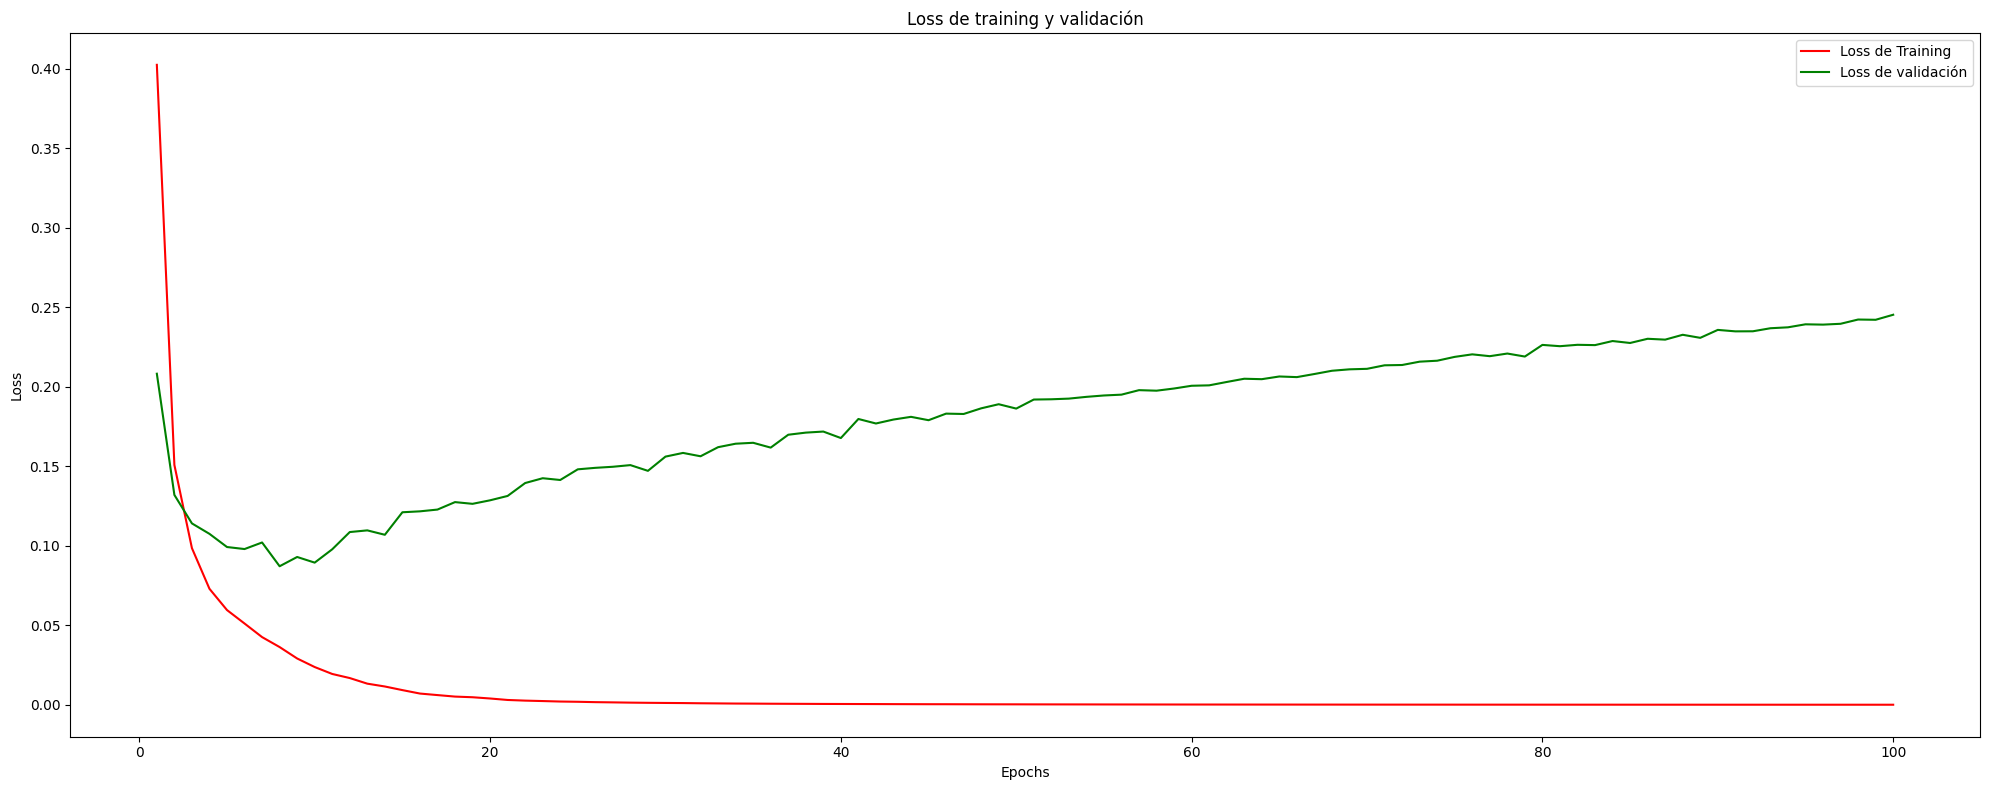

In [22]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(tr_loss))]

# Gráfico
plt.figure(figsize= (20, 8))

plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación')
plt.title('Loss de training y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Evaluación del modelo:

### Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.

In [23]:
y_test

204    0.0
70     1.0
131    1.0
431    0.0
540    0.0
      ... 
486    0.0
75     1.0
249    0.0
238    0.0
265    1.0
Name: diagnosis, Length: 114, dtype: float64

In [24]:
y_pred_nn = model.predict(X_test_scaled)


y_pred_nn_binarized = [1 if y > 0.95 else 0 for y in y_pred_nn]


accuracy_nn = accuracy_score(y_test, y_pred_nn_binarized)
precision_nn = precision_score(y_test, y_pred_nn_binarized)
recall_nn = recall_score(y_test, y_pred_nn_binarized)
f1_nn = f1_score(y_test, y_pred_nn_binarized)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)


print(f"Accuracy Neural Network: {accuracy_nn}")
print(f"Precision Neural Network: {precision_nn}")
print(f"Recall Neural Network: {recall_nn}")
print(f"F1 Neural Network: {f1_nn}")
print(f"ROC AUC Neural Network: {roc_auc_nn}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Accuracy Neural Network: 0.9824561403508771
Precision Neural Network: 1.0
Recall Neural Network: 0.9534883720930233
F1 Neural Network: 0.9761904761904762
ROC AUC Neural Network: 0.9911562397641663


In [25]:
classification_report_nn = classification_report(y_test, y_pred_nn_binarized)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binarized)

print("Reporte de Clasificación Neural Network")
print(classification_report_nn)
print("Matriz de confusión Neural Network")
print(conf_matrix_nn)

Reporte de Clasificación Neural Network
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Matriz de confusión Neural Network
[[71  0]
 [ 2 41]]


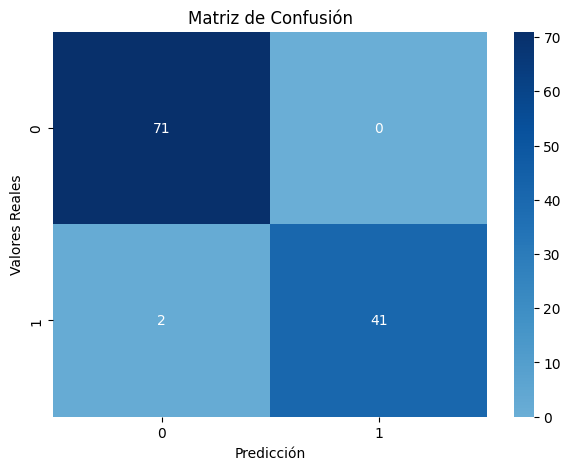

In [26]:
graficar_matriz_confusion(conf_matrix_nn, figsize=(7, 5))

### Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

De los resultados podemos destacar:

* No se detectó ningún valor real positivo como negativo
* Hubo una cantidad muy pequeña de falsos positivos
* En donde podría mejorar el modelos es el recall

De estos resultados, podemos determinar que el modelo entrenado es bueno para este tipo de clasificación binaria. Se podría mejorar agregando más capas ocultas, y probando otros tipos de funciones de activación aparte del relu. También, es posible probar otros optimizadores aparte del adam, como el descenso de gradiente estocástico.